In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

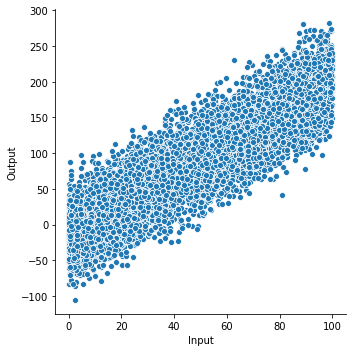

In [36]:
# Create a dataset and visualize it
X = pd.Series([np.random.uniform(0, 100) for i in range(0, 10000)])
y = pd.Series([2*x*np.random.uniform(1,1.1) + 3+np.random.normal(-15, 30)  for x in X])
train_df = pd.DataFrame(data = {'Input': X, 'Output': y})
sns.relplot(data=train_df, x='Input', y='Output')

In [3]:
# Same loss function and partial derivatives as other gradient descent implementation

In [43]:
# Implement stochastic gradient descent function to minimize loss function in mini batches
def calc_gradient(x_batch, y_batch, a, b):
    N = len(x_batch)
    
    d_da = 0
    d_db = 0
    for i in range(N):
        x = x_batch[i]
        y = y_batch[i]

        d_da += -2*x*(y - (a*x + b))
        d_db += -2*(y - (a*x + b))
    
    # Divide to get average 
    grad_a = (1/float(N))*d_da
    grad_b = (1/float(N))*d_db
    
    return grad_a, grad_b

# Perform as many epochs as needed
def gradient_descent(inputs, outputs, alpha=.0001, a=0, b=0, num_epochs=100, batch_size=100):
    diff = 0
    
    N = len(inputs)
    inputs = np.array(inputs)
    outputs = np.array(outputs)
    # Conveniently pair data into [[x1,y1], [x2,y2] ... [xn,yn]]
    xy = np.c_[inputs.reshape(N, -1), outputs.reshape(N, 1)]
    rng = np.random.default_rng(seed=123845)
    rng.shuffle(xy)
    
    for i in range(num_epochs):
        # Shuffle x and y
        rng.shuffle(xy)
        
        for start in range(0, N, batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:]
        
            grad_a, grad_b = calc_gradient(x_batch, y_batch, a, b)

            # After gradient vector is found, adjust scale (aka the learning rate). 
            # Subtract because we are minimizing (gradient should point to the most decreasing slope).
            a = a - grad_a * alpha
            b = b - grad_b * alpha
        
        if i%10 == 0:
            print(f'Current weights: {a}, {b}')
        
    return a, b


coef_a, coef_b = gradient_descent(X, y)

Current weights: [1.95659886], [-0.03032682]
Current weights: [1.97571533], [-0.61345965]
Current weights: [1.91558601], [-1.16818179]
Current weights: [1.92675907], [-1.69425924]
Current weights: [1.87961619], [-2.19553529]
Current weights: [1.90320308], [-2.67137776]
Current weights: [2.00186545], [-3.12264072]
Current weights: [2.01038208], [-3.55229777]
Current weights: [1.92638877], [-3.96287984]
Current weights: [2.02471093], [-4.34985322]


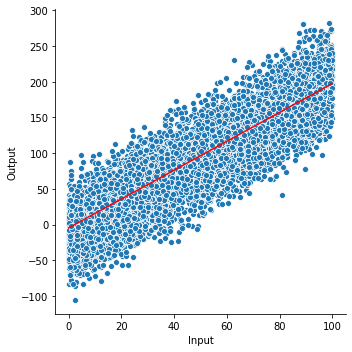

In [44]:
# Plot model's regression line
x1 = 0
x2 = 100
y1 = coef_a*x1+coef_b
y2 = coef_a*x2+coef_b

sns.relplot(data=train_df, x='Input', y='Output')
plt.plot([x1, x2], [y1, y2], color='r')